In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\DATA SCI AND ML\\trunc_loan.csv')

E:\Anaonda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,addr_state,annual_inc,collection_recovery_fee,collections_12_mths_ex_med,delinq_2yrs,desc,dti,earliest_cr_line,emp_length,...,sub_grade,term,title,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url
0,495242,IL,95000.0,0.0000,0.0,0.0,0,10.30,May-1993,4 years,...,C1,36 months,Debt consolidation,30.0,7521.680000,7521.68,1585.34,0.0,5936.34,0.0
1,495243,TX,66000.0,236.3598,0.0,2.0,0,12.62,Dec-2008,1 year,...,D2,60 months,Medical expenses,25.0,7366.250000,7366.25,3341.65,0.0,2711.49,0.0
2,495244,FL,137500.0,0.0000,0.0,0.0,0,13.42,May-2002,10+ years,...,A5,36 months,Debt consolidation,37.0,10962.479076,10962.48,962.48,0.0,10000.00,0.0
3,495245,CA,65000.0,0.0000,0.0,0.0,0,11.71,Nov-1992,10+ years,...,D5,60 months,Credit card refinancing,34.0,35770.812746,35770.81,3570.81,0.0,32200.00,0.0
4,495246,OR,35000.0,0.0000,0.0,0.0,0,6.73,Sep-2009,3 years,...,B1,36 months,Moving and relocation,24.0,2662.590238,2662.59,62.59,0.0,2600.00,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855502 entries, 0 to 855501
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   855502 non-null  int64  
 1   addr_state                   855502 non-null  object 
 2   annual_inc                   855502 non-null  float64
 3   collection_recovery_fee      855502 non-null  float64
 4   collections_12_mths_ex_med   855502 non-null  float64
 5   delinq_2yrs                  855502 non-null  float64
 6   desc                         855502 non-null  object 
 7   dti                          855502 non-null  float64
 8   earliest_cr_line             855502 non-null  object 
 9   emp_length                   855502 non-null  object 
 10  emp_title                    855502 non-null  object 
 11  funded_amnt                  855502 non-null  int64  
 12  funded_amnt_inv              855502 non-null  float64
 13 

In [5]:
df['loan_status']
df.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [6]:
df1 = pd.DataFrame()
values = ['Current','Late (31-120 days)','In Grace Period', 'Late (16-30 days)', 'Default']

a=[]
b=[]
for i, row in df.iterrows():
    a.append(np.where(df.loan_status.loc[i] in values, "Current","Closed"))
    b.append(np.where(df.loan_status.loc[i] in values, "Bad","Good"))
    
a= pd.DataFrame(a)
b=pd.DataFrame(b)
df1= pd.concat([df1, a], axis=1) 
df1= df1.rename(columns={0: "loan_status_type"})
df1=pd.concat([df1, b], axis=1)
df1= df1.rename(columns={0: "loan_status_standing"})

In [7]:
df1['loan_status_type'].value_counts()
df1['loan_status_standing'].value_counts()

Good    648111
Bad     207391
Name: loan_status_standing, dtype: int64

In [8]:
df1.head()

,loan_status_type,loan_status_standing
0,Current,Bad
1,Closed,Good
2,Closed,Good
3,Closed,Good
4,Closed,Good


In [9]:
df['issue_d'].head()

0    Sep-2016
1    Sep-2016
2    Sep-2016
3    Sep-2016
4    Sep-2016
Name: issue_d, dtype: object

In [10]:
df1= pd.concat([df1, df['issue_d']], axis=1)

In [11]:
df1.head()

,loan_status_type,loan_status_standing,issue_d
0,Current,Bad,Sep-2016
1,Closed,Good,Sep-2016
2,Closed,Good,Sep-2016
3,Closed,Good,Sep-2016
4,Closed,Good,Sep-2016


In [12]:
df1.drop(columns=['issue_d', 'issue_d'])

,loan_status_type,loan_status_standing
0,Current,Bad
1,Closed,Good
2,Closed,Good
3,Closed,Good
4,Closed,Good
...,...,...
855497,Closed,Good
855498,Closed,Good
855499,Closed,Good
855500,Closed,Good


In [13]:
df1

,loan_status_type,loan_status_standing,issue_d
0,Current,Bad,Sep-2016
1,Closed,Good,Sep-2016
2,Closed,Good,Sep-2016
3,Closed,Good,Sep-2016
4,Closed,Good,Sep-2016
...,...,...,...
855497,Closed,Good,Jan-2015
855498,Closed,Good,Jan-2015
855499,Closed,Good,Jan-2015
855500,Closed,Good,Jan-2015


In [14]:
df1 = df1.drop(columns=['issue_d', 'issue_d'])

In [15]:
df1.head()

,loan_status_type,loan_status_standing
0,Current,Bad
1,Closed,Good
2,Closed,Good
3,Closed,Good
4,Closed,Good


In [16]:
df1= pd.concat([df1, df['issue_d']], axis=1)

In [17]:
df1

,loan_status_type,loan_status_standing,issue_d
0,Current,Bad,Sep-2016
1,Closed,Good,Sep-2016
2,Closed,Good,Sep-2016
3,Closed,Good,Sep-2016
4,Closed,Good,Sep-2016
...,...,...,...
855497,Closed,Good,Jan-2015
855498,Closed,Good,Jan-2015
855499,Closed,Good,Jan-2015
855500,Closed,Good,Jan-2015


In [18]:
df1.issue_d.unique()

array(['Sep-2016', 'Aug-2016', 'Jul-2016', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Mar-2016', 'Feb-2016', 'Jan-2016', 'Dec-2016',
       'Nov-2016', 'Oct-2016', 'Dec-2015', 'Nov-2015', 'Oct-2015',
       'Sep-2015', 'Aug-2015', 'Jul-2015', 'Jun-2015', 'May-2015',
       'Apr-2015', 'Mar-2015', 'Feb-2015', 'Jan-2015'], dtype=object)

In [20]:
df.total_pymnt

0          7521.680000
1          7366.250000
2         10962.479076
3         35770.812746
4          2662.590238
              ...     
855497    11947.244045
855498    28663.686660
855499     5366.990000
855500     6109.520000
855501    23735.386335
Name: total_pymnt, Length: 855502, dtype: float64

In [21]:
df.issue_d

0         Sep-2016
1         Sep-2016
2         Sep-2016
3         Sep-2016
4         Sep-2016
            ...   
855497    Jan-2015
855498    Jan-2015
855499    Jan-2015
855500    Jan-2015
855501    Jan-2015
Name: issue_d, Length: 855502, dtype: object

In [22]:
df1= pd.concat([df1, df['total_pymnt']], axis=1)

In [36]:
df1.head()

,issue_d,loan_status_type,total_pymnt
0,Apr-2015,Closed,4.839215e+08
1,Apr-2015,Current,8.276653e+07
2,Apr-2016,Closed,3.208529e+08
3,Apr-2016,Current,2.030064e+08
4,Aug-2015,Closed,4.827409e+08


In [35]:
df1 = df1.groupby(['issue_d', 'loan_status_type']).sum().reset_index()

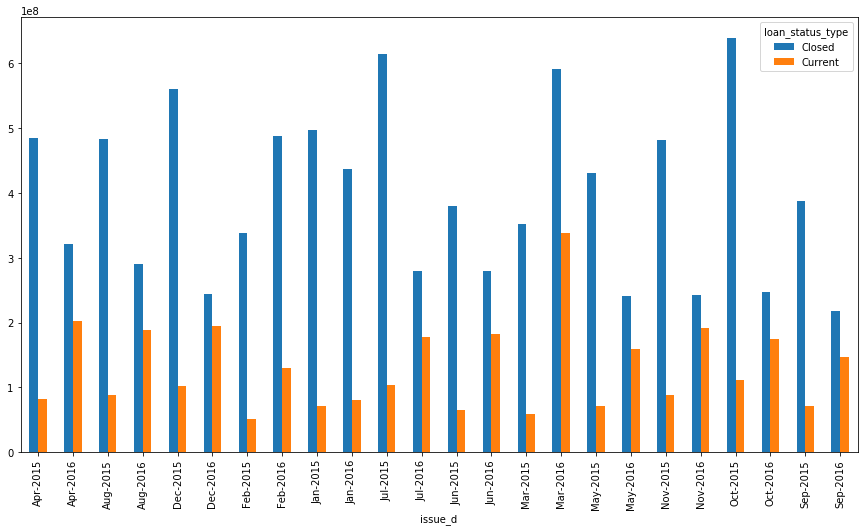

In [40]:
df1.pivot(index = 'issue_d', columns = 'loan_status_type', values = 'total_pymnt').plot(kind = 'bar', figsize = (15,8))